In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from https://academic.oup.com/mnras/article/449/4/3981/1195237#92052944 (fig.4)
# DataThief

# Radius in arcsec
disksbp_arcsec = np.loadtxt("../data/NGC5005-disk_arcsec.txt")
rarcsec, disk_arcsec, Yerr_arcsec1, Yerr_arcsec2 = disksbp_arcsec.T

# Radius in kpc
disksbp_kpc = np.loadtxt("../data/NGC5005-disk_kpc.txt")
rkpc, disk_kpc, Yerr_kpc1, Yerr_kpc2 = disksbp_kpc.T

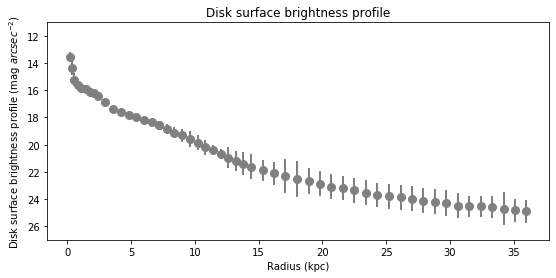

In [3]:
# Plot Disk surface brightness profile in kpc
plt.figure(figsize=(9,4))
#plt.scatter(rkpc,disk_kpc)
plt.errorbar(rkpc,disk_kpc,yerr=[Yerr_kpc1,Yerr_kpc2], marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2)
plt.title("Disk surface brightness profile")
plt.xlabel("Radius (kpc)")
plt.ylabel("Disk surface brightness profile (mag $arcsec^{-2}$)")
plt.ylim(27,11)
plt.show()

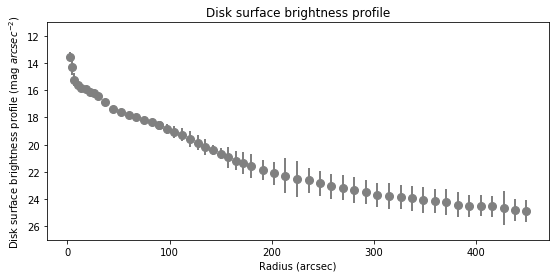

In [4]:
# Plot Disk surface brightness profile in arcsec
plt.figure(figsize=(9,4))
plt.scatter(rarcsec,disk_arcsec)
plt.errorbar(rarcsec,disk_arcsec,yerr=[Yerr_arcsec1,Yerr_arcsec2], marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2)
plt.title("Disk surface brightness profile")
plt.xlabel("Radius (arcsec)")
plt.ylabel("Disk surface brightness profile (mag $arcsec^{-2}$)")
plt.ylim(27,11)
plt.show()

In [5]:
distance = 16.5                             # Distance in megaparsec (from https://academic.oup.com/mnras/article/449/4/3981/1195237#920592944)
disk_MSun_arcsec = 10**(-0.4*disk_kpc)
disk_MSun_pc = (4.8481e-6 * distance)**(-2) * disk_MSun_arcsec

In [6]:
# Radius in kpc
np.savetxt("../data/disk_msun_pc.txt", 
           np.transpose([rkpc, disk_MSun_pc]), 
           delimiter='\t', 
           fmt='%10.5f',
           header='Datathief \n Disk Surface Brightness from https://academic.oup.com/mnras/article/449/4/3981/1195237#92052944 (fig.4) \n MAG/ARCSEC**2 converted to MSUN/PC**2 in python \n units: x-axis: kpc, y-axis: Bulge (Msun pc^-2)')